In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d prathumarikeri/indian-sign-language-isl
!unzip indian-sign-language-isl.zip


Streaming output truncated to the last 5000 lines.
  inflating: Indian/V/819.jpg        
  inflating: Indian/V/82.jpg         
  inflating: Indian/V/820.jpg        
  inflating: Indian/V/821.jpg        
  inflating: Indian/V/822.jpg        
  inflating: Indian/V/823.jpg        
  inflating: Indian/V/824.jpg        
  inflating: Indian/V/825.jpg        
  inflating: Indian/V/826.jpg        
  inflating: Indian/V/827.jpg        
  inflating: Indian/V/828.jpg        
  inflating: Indian/V/829.jpg        
  inflating: Indian/V/83.jpg         
  inflating: Indian/V/830.jpg        
  inflating: Indian/V/831.jpg        
  inflating: Indian/V/832.jpg        
  inflating: Indian/V/833.jpg        
  inflating: Indian/V/834.jpg        
  inflating: Indian/V/835.jpg        
  inflating: Indian/V/836.jpg        
  inflating: Indian/V/837.jpg        
  inflating: Indian/V/838.jpg        
  inflating: Indian/V/839.jpg        
  inflating: Indian/V/84.jpg         
  inflating: Indian/V/840.jpg        

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the images and labels
data_dir = '/content/Indian'
categories = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z' ]  # Update with actual labels

images = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            resized_img = cv2.resize(img_array, (64, 64))  # Resize for consistency
            images.append(resized_img)
            labels.append(class_num)
        except Exception as e:
            pass

images = np.array(images).reshape(-1, 64, 64, 1) / 255.0  # Normalize
labels = np.array(labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to avoid overfitting
model.add(Dense(len(categories), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,290,790 (12.55 MB)

 Trainable params: 3,290,790 (12.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8808 - loss: 0.4514 - val_accuracy: 0.9973 - val_loss: 0.0092
Epoch 2/10
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9925 - loss: 0.0247 - val_accuracy: 0.9998 - val_loss: 0.0024
Epoch 3/10
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9976 - loss: 0.0078 - val_accuracy: 0.9999 - val_loss: 5.6365e-04
Epoch 4/10
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9969 - loss: 0.0109 - val_accuracy: 0.9997 - val_loss: 0.0015
Epoch 5/10
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9973 - loss: 0.0094 - val_accuracy: 0.9999 - val_loss: 0.0012
Epoch 6/10
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9974 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 9.4040e-06
Epoch 7/10
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9985 - loss: 0.0051 - val_accuracy: 0.9999 - val_loss: 1.7767e-04
Epoch 8/10
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Save the model
model.save('isl_model.h5')


291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 2.5359e-04


Test Accuracy: 0.99989253282547


In [ ]:
model.save("my_model.keras")

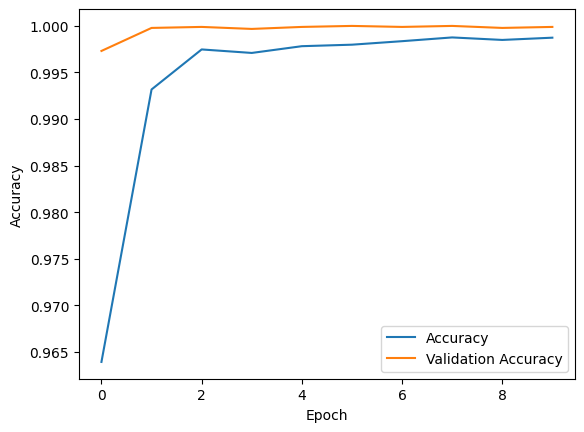

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


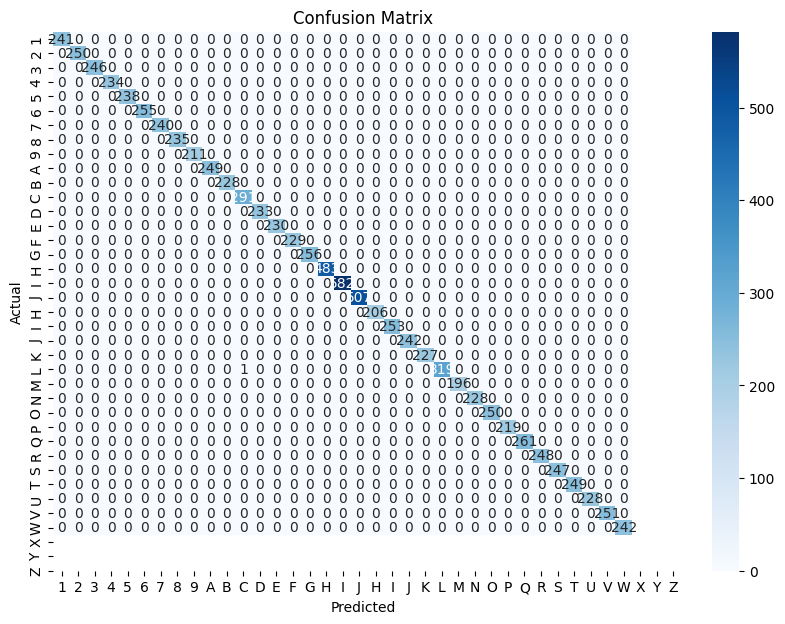

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       250
           3       1.00      1.00      1.00       246
           4       1.00      1.00      1.00       234
           5       1.00      1.00      1.00       238
           6       1.00      1.00      1.00       255
           7       1.00      1.00      1.00       240
           8       1.00      1.00      1.00       235
           9       1.00      1.00      1.00       211
           A       1.00      1.00      1.00       249
           B       1.00      1.00      1.00       228
           C       1.00      1.00      1.00       291
           D       1.00      1.00      1.00       233
           E       1.00      1.00      1.00       230
           F       1.00      1.00      1.00       229
           G       1.00      1.00      1.00       256
           H       1.00      1.00      1.00       483
           I       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 35, does not match size of target_names, 38
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict the classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Visualize Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate Classification Report
# Ensure that the number of categories matches the number of unique labels in y_true_classes and y_pred_classes
unique_labels = sorted(set(y_true_classes) | set(y_pred_classes))
print(classification_report(y_true_classes, y_pred_classes, labels=unique_labels, target_names=categories))


In [ ]:
def predict_sign(image_path):
    # Load and preprocess the image
    img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_img = cv2.resize(img_array, (64, 64))
    resized_img = resized_img.reshape(1, 64, 64, 1) / 255.0  # Normalize

    # Predict the class
    prediction = model.predict(resized_img)
    predicted_class = np.argmax(prediction)
    predicted_label = categories[predicted_class]

    print(f'Predicted Label: {predicted_label}')

    # Plot the image
    plt.imshow(img_array, cmap='gray')
    plt.title(f'Predicted Sign: {predicted_label}')
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Label: 1


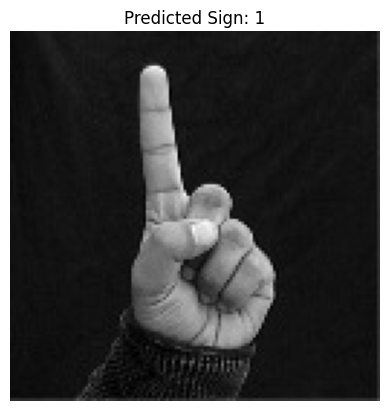

In [ ]:
# Example: Predict a sign from a new image
image_path = '/content/Indian/1/1.jpg'  # Replace with actual path
predict_sign(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


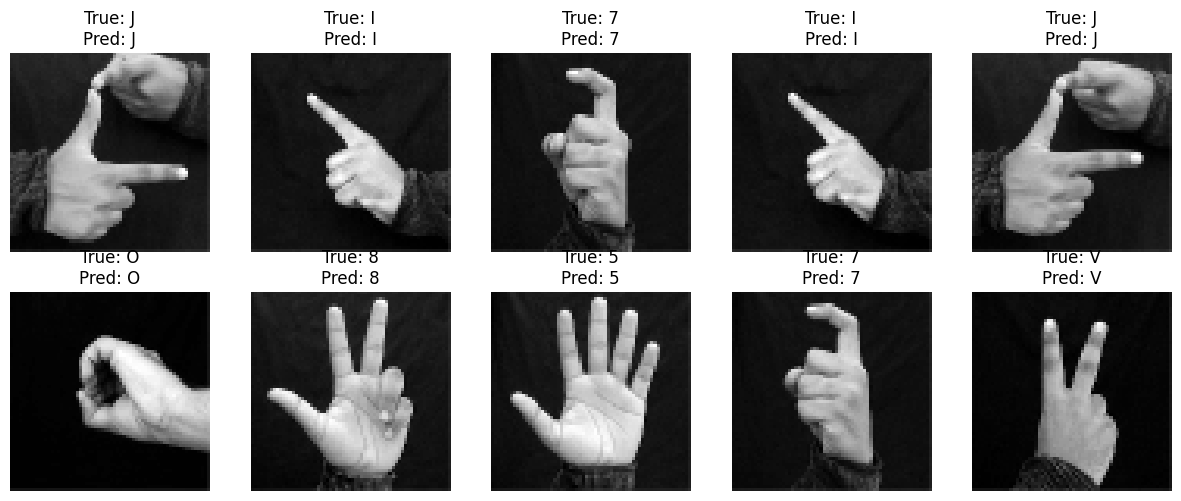

In [ ]:
def visualize_predictions(n_images):
    plt.figure(figsize=(15, 15))

    for i in range(n_images):
        ax = plt.subplot(5, 5, i + 1)  # Adjust depending on how many images you want to show
        img = X_test[i].reshape(64, 64)
        true_label = categories[np.argmax(y_test[i])]
        pred_label = categories[np.argmax(model.predict(X_test[i].reshape(1, 64, 64, 1)))]

        plt.imshow(img, cmap='gray')
        plt.title(f'True: {true_label}\nPred: {pred_label}')
        plt.axis('off')

    plt.show()

# Example: Visualize predictions for the first 10 images in the test set
visualize_predictions(10)
